In [1]:
import numpy as np
import pandas as pd
from sympy import isprime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cities = pd.read_csv('../input/cities.csv')
cities_len = len(cities)
print("len: ", cities_len)
cities_xy = np.stack((cities.X.values, cities.Y.values), axis=1)
cities_xy[0:5]

len:  197769


array([[ 316.83673906, 2202.34070734],
       [4377.40597217,  336.60208217],
       [3454.15819771, 2820.05301125],
       [4688.09929763, 2935.89805581],
       [1010.69695175, 3236.75098903]])

In [5]:
def get_score(path):
    xy = cities_xy[path]
    values = np.linalg.norm(xy-np.roll(xy, -1, axis=0), axis=1)
    prime_value = (values[9::10] * [int(isprime(i)==False)*0.1 for i in path[9::10]]).sum()
    return values.sum() + prime_value

def get_score_not_prime(path):
    xy = cities_xy[path]
    values = np.linalg.norm(xy-np.roll(xy, -1, axis=0), axis=1)
    return values.sum()

In [6]:
#path = pd.read_csv('../input/submission_20181210.csv')
path = pd.read_csv('../input/sample_submission.csv')
path = path['Path'].values
get_score(path)

446884407.5212081

In [54]:
# def put_cities_one_by_one():
#     p = np.array([0,1,0])
#     best_path = None
#     for i in range(cities_len-2):
#         print ('city count : {}'.format(i+1), end="\r")
#         pn = i+2
#         min_dist = 999999999
#         best_path = None
#         for j in range(len(p-1)):
#             dist = get_score_not_prime(p[j-1:j+1])
#             pnn = np.insert(p, j+1, pn)
#             dist_test = get_score_not_prime(pnn[j-1:j+2])
#             if dist_test - dist < min_dist:
#                 min_dist = dist_test-dist
#                 best_path = pnn
#         p = best_path
#     return best_path

# best_path = put_cities_one_by_one()
# print(get_score(best_path), best_path)

In [39]:
def get_near_list(p, pn):
    p_xy = cities_xy[p]
    pn_xy = cities_xy[pn] 
    gap_x = (p_xy[:,0].max() - p_xy[:,0].min())/len(p_xy)+1
    gap_y = (p_xy[:,1].max() - p_xy[:,1].min())/len(p_xy)+1
    while True:
        list_test = np.where((p_xy[:,0] >pn_xy[0]-gap_x) & 
                             (p_xy[:,0] <pn_xy[0]+gap_x) &
                             (p_xy[:,1] >pn_xy[1]-gap_y) & 
                             (p_xy[:,1] <pn_xy[1]+gap_y))
        if len(list_test[0]) == 0:
            gap_x *= 2
            gap_y *= 2
        else:
            break
    return list_test[0]

def put_cities_one_by_one():
    p = np.array([0,1,0])
    best_path = None
    for i in range(cities_len-2):
        print ('city count : {}'.format(i+1), end="\r")
        pn = i+2
        list_test = get_near_list(p, pn)
        
        min_dist = 999999999
        best_path = None
        for k in list_test:
            if k == 0: 
                continue;
            dist = get_score_not_prime(p[k-1:k+1])
            pnn = np.insert(p, k+1, pn)
            dist_test = get_score_not_prime(pnn[k-1:k+2])
            if dist_test - dist < min_dist:
                min_dist = dist_test-dist
                best_path = pnn
        p = best_path
    return best_path

def move_cities_one_by_one(path):
    p = path
    best_path = path
    for i in range(cities_len-1):
        print ('city count : {}'.format(i+1), end="\r")
        print(p)
        pn = path[i+1]
        list_test = get_near_list(p, pn)
        
        print(p)
        min_dist = get_score(p)
        best_path = None
        for k in list_test:
            if k == 0: 
                continue;
            pnn = p    
            pnn[pn], pnn[k] = pnn[k], pnn[pn]
            dist_test = get_score(pnn)
            if dist_test < min_dist:
                min_dist = dist_test
                best_path = pnn
        p = best_path
    return best_path

In [59]:
def sort_path(path):
    xy = cities_xy[path]
    dists = np.linalg.norm(xy-cities_xy[0], axis=1)
    list_ntp = np.argsort(dists)
    return path[list_ntp]

def put_cities_same_things():
    path = np.append(np.arange(cities_len), [0])
    p = np.array([0,0])
    pr = path[1:-1]
    best_path = None
    while len(pr) != 0:
        list_near = get_near_list(pr, 0)
        pr = np.delete(pr, list_near)
        list_near = sort_path(list_near)
        
        for pn in list_near:
            print ('city count : {}'.format(len(p)), end="\r")  
            list_test = get_near_list(p, pn)
        
            min_dist = 999999999
            best_path = None
            for k in list_test:
                if k == 0 or k > len(p)-1: 
                    continue;
                dist = get_score_not_prime(p[k-1:k+1])
                pnn = np.insert(p, k+1, pn)
                dist_test = get_score_not_prime(pnn[k-1:k+2])
                if dist_test - dist < min_dist:
                    min_dist = dist_test-dist
                    best_path = pnn
            p = best_path
    return best_path

best_path = put_cities_same_things()
print(get_score(best_path), best_path)
#1. 2321394.61246058079

2282168.2107495666 [     0      0      0 ... 107565 113196 113196]


In [58]:
best_path[:10]

array([    0,     0,     0,     0,  2187,  2187,  2187, 11752, 11752,
       21210])

In [ ]:
xy = cities_xy[best]
dists = np.linalg.norm(xy-cities_xy[0], axis=1)

In [53]:
def put_cities_near_to_par():
    path = np.append(np.arange(cities_len), [0])
    p = np.array([0,0])
    xy = cities_xy[path]
    dists = np.linalg.norm(xy-xy[0], axis=1)
    dists = dists[1:-1]
    list_ntp = np.argsort(dists)
    
    best_path = None
    for pn in list_ntp:
        print ('city count : {}'.format(len(p)), end="\r")
        list_test = get_near_list(p, pn)
        
        p_len = len(p)
        min_dist = 999999999
        best_path = None
        for k in list_test:
            if k == 0 or k > p_len-1: 
                continue;
            dist = get_score_not_prime(p[k-1:k+1])
            pnn = np.insert(p, k+1, pn)
            dist_test = get_score_not_prime(pnn[k-1:k+2])
            if dist_test - dist < min_dist:
                min_dist = dist_test-dist
                best_path = pnn
        p = best_path
    return best_path

best_path = put_cities_near_to_par()
print(get_score(best_path), best_path)

2444018.23051655969 [     0      0 137367 ...  93526 105754 188181]


In [ ]:
def fix_path_small_permutation(seq_len:int=6, band_len:int=1, start_index:int=None):
    if band_len is None:
        band_len = np.random.choice(int((cities_len-1)/seq_len)) + 1
    small_len = band_len*seq_len
    if start_index is None:
        start_index = np.random.choice(cities_len - 1 - small_len)+1
    remainder = start_index%10
    if remainder == 0:
        score_start_index = start_index - 10
    else:
        score_start_index = start_index - remainder
    small = path[start_index : start_index + small_len]
    small_start = path[score_start_index:start_index]
    small_end = path[start_index + small_len:start_index + small_len+1]
    
    small_score = path[score_start_index: start_index + small_len+1]
    score = get_score(small_score)
    if band_len > 1:
        small = small.reshape((-1,band_len))
    for item in permutations(small):
        if band_len > 1:
            item = np.concatenate(item)
        small_path_test = np.concatenate((small_start, item, small_end))
        score_test = get_score(small_path_test)
        if score_test < score:
            path[start_index : start_index + small_len] = item
            print("path updated, score : ", get_score(path))
            score = score_test


def fix_path_use_thread(band_len:int=None, first_index:int=None):
    seq_len = 6
    if band_len is None:
        band_len = np.random.choice(int((cities_len-1)/seq_len)) + 1
    small_len = band_len * seq_len
    if first_index is None:
        first_index = np.random.choice(small_len)
    print('band_len:', band_len, ", first_index:", first_index)    
    threads_len = int((cities_len-1)/small_len)
    threads = []
    for i in range(threads_len+2):
        if i == 0:
            start_index = 1    
        else :
            start_index = first_index + (small_len * (i-1)) + 1
        
        if start_index > cities_len:
            break
        elif start_index + small_len + 1 > cities_len:
            start_index = first_index + cities_len-small_len-1
        t = threading.Thread(target=fix_path_small_permutation, args=(seq_len, band_len, start_index))
        threads.append(t)
    for t in threads:
        t.start()
    for t in threads:
        t.join()
        
print("start score : ", get_score(path))
for i in range(6):
    fix_path_use_thread(1, i)
    #print(i)
print("final score : ", get_score(path))        

In [46]:
best_path[len(best_path)-10:]

array([139108,  91507,  91507,  85737,  30355, 112816, 112816, 173403,
        97745,  35608])

In [49]:
a = np.arange(5,15)
b = np.append(a, [0])
np.insert(a, len(a)-1, 1)

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13,  1, 14])

In [62]:
get_score(best_path)

3037963.910829192

In [49]:
p = np.array([0,1,0])
pn = 2
p_xy = cities_xy[p]
pn_xy = cities_xy[pn]  
print(p_xy)
gap_x = int((p_xy[:,0].max() - p_xy[:,0].min())/len(p_xy))
gap_y = int((p_xy[:,1].max() - p_xy[:,1].min())/len(p_xy))
print(pn_xy[0], pn_xy[1], gap_x, gap_y)
while True:
    list_test = np.where((p_xy[:,0] >pn_xy[0]-gap_x) & (p_xy[:,0] <pn_xy[0]+gap_x) &
                         (p_xy[:,1] >pn_xy[1]-gap_y) & (p_xy[:,1] <pn_xy[1]+gap_y) )
    if len(list_test[0]) == 0:
        gap_x *= 2
        gap_y *= 2
    else:
        break


        
print(list_test)

[[ 316.83673906 2202.34070734]
 [4377.40597217  336.60208217]
 [ 316.83673906 2202.34070734]]
3454.15819771172 2820.0530112481106 1353 621
0 []
0 []
3 [0 1 2]
(array([0, 1, 2], dtype=int64),)


In [47]:
a = np.array([])
len(a)

0

In [45]:
from sklearn.cluster import KMeans

n_clusters = 30
kmeans = KMeans(n_clusters=n_clusters).fit(cities[['X', 'Y']])
kmeans.labels_

array([ 8,  7, 23, ...,  6, 13, 20])

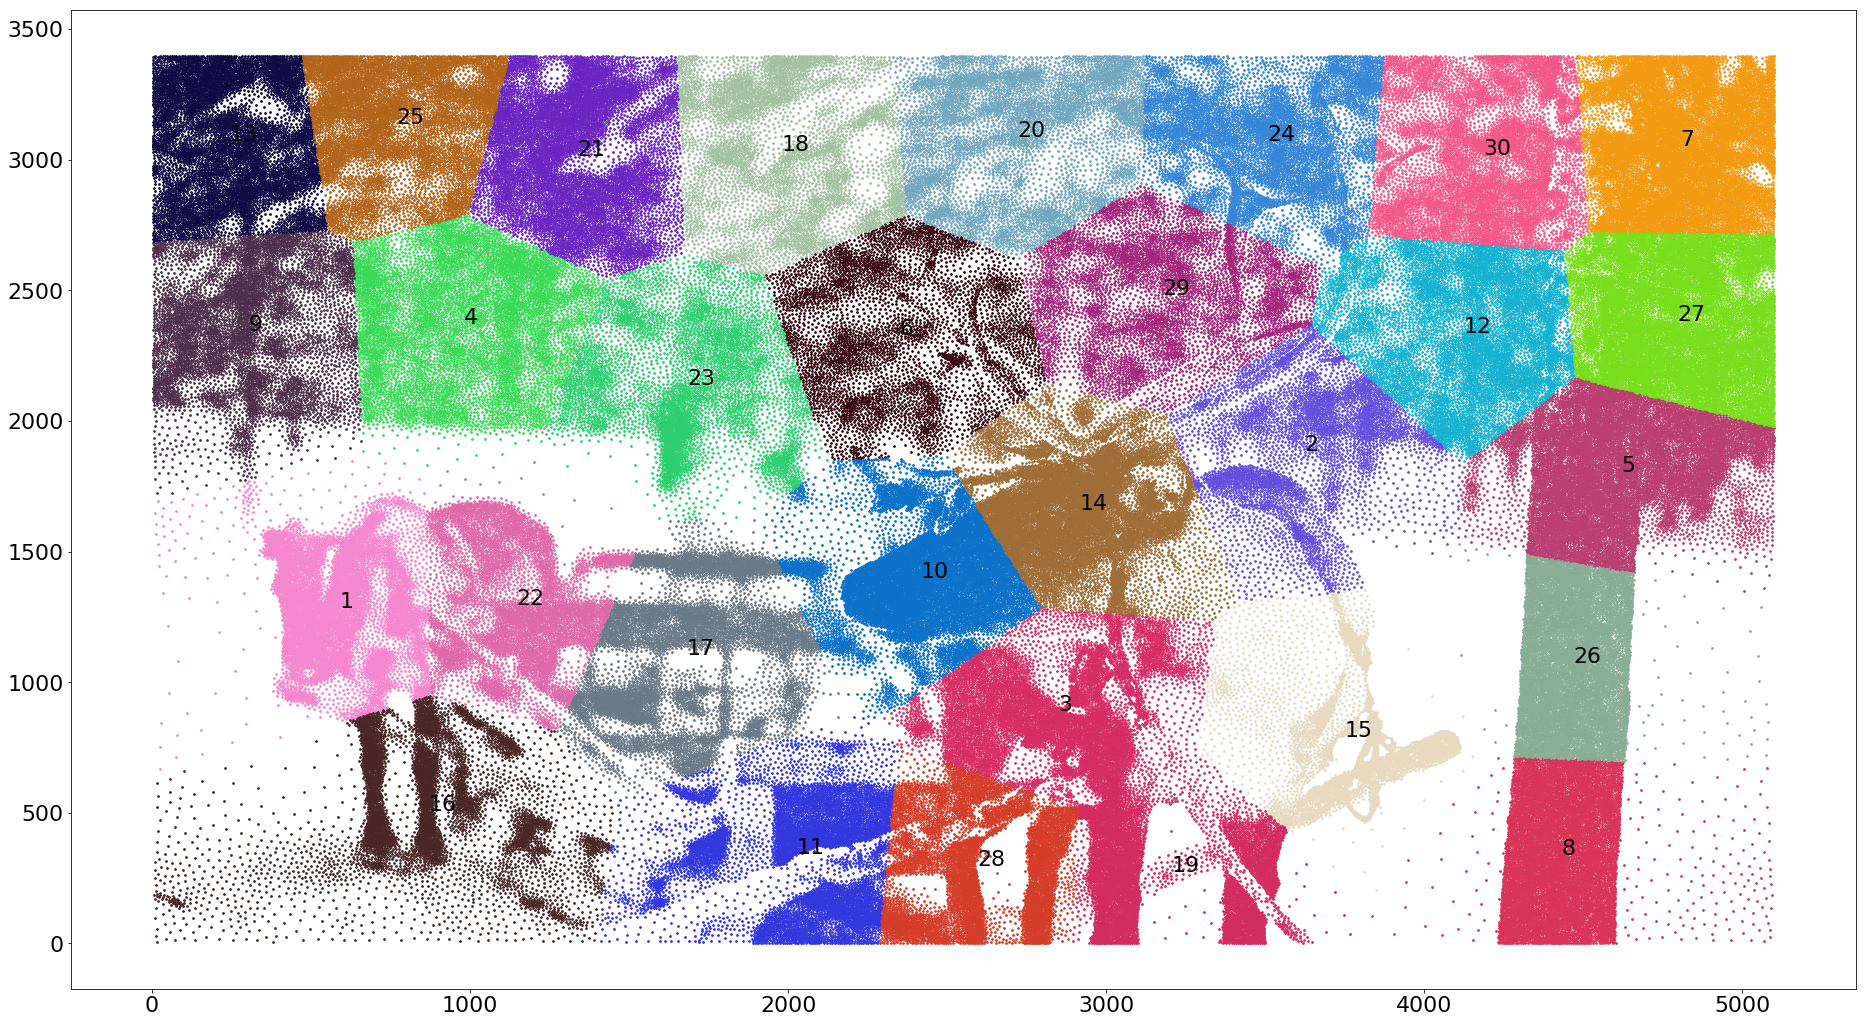

In [68]:
fig, ax = plt.subplots(figsize=(32,18))
plt.rcParams.update({'font.size': 22})
for i in range(n_clusters):
    c = [np.random.random_sample(), np.random.random_sample(), np.random.random_sample()]
    points = cities[kmeans.labels_==i]
    mean = points.mean()
    
    plt.scatter(points.X, points.Y, color=c, s=3)
    ax.annotate(str(i+1), (mean.X, mean.Y))    

In [ ]:
from scipy.spatial import distance_matrix

distance_matrix(cities[['X', 'Y']], cities[:10][['X', 'Y']])

In [24]:
len(best_path)

3845

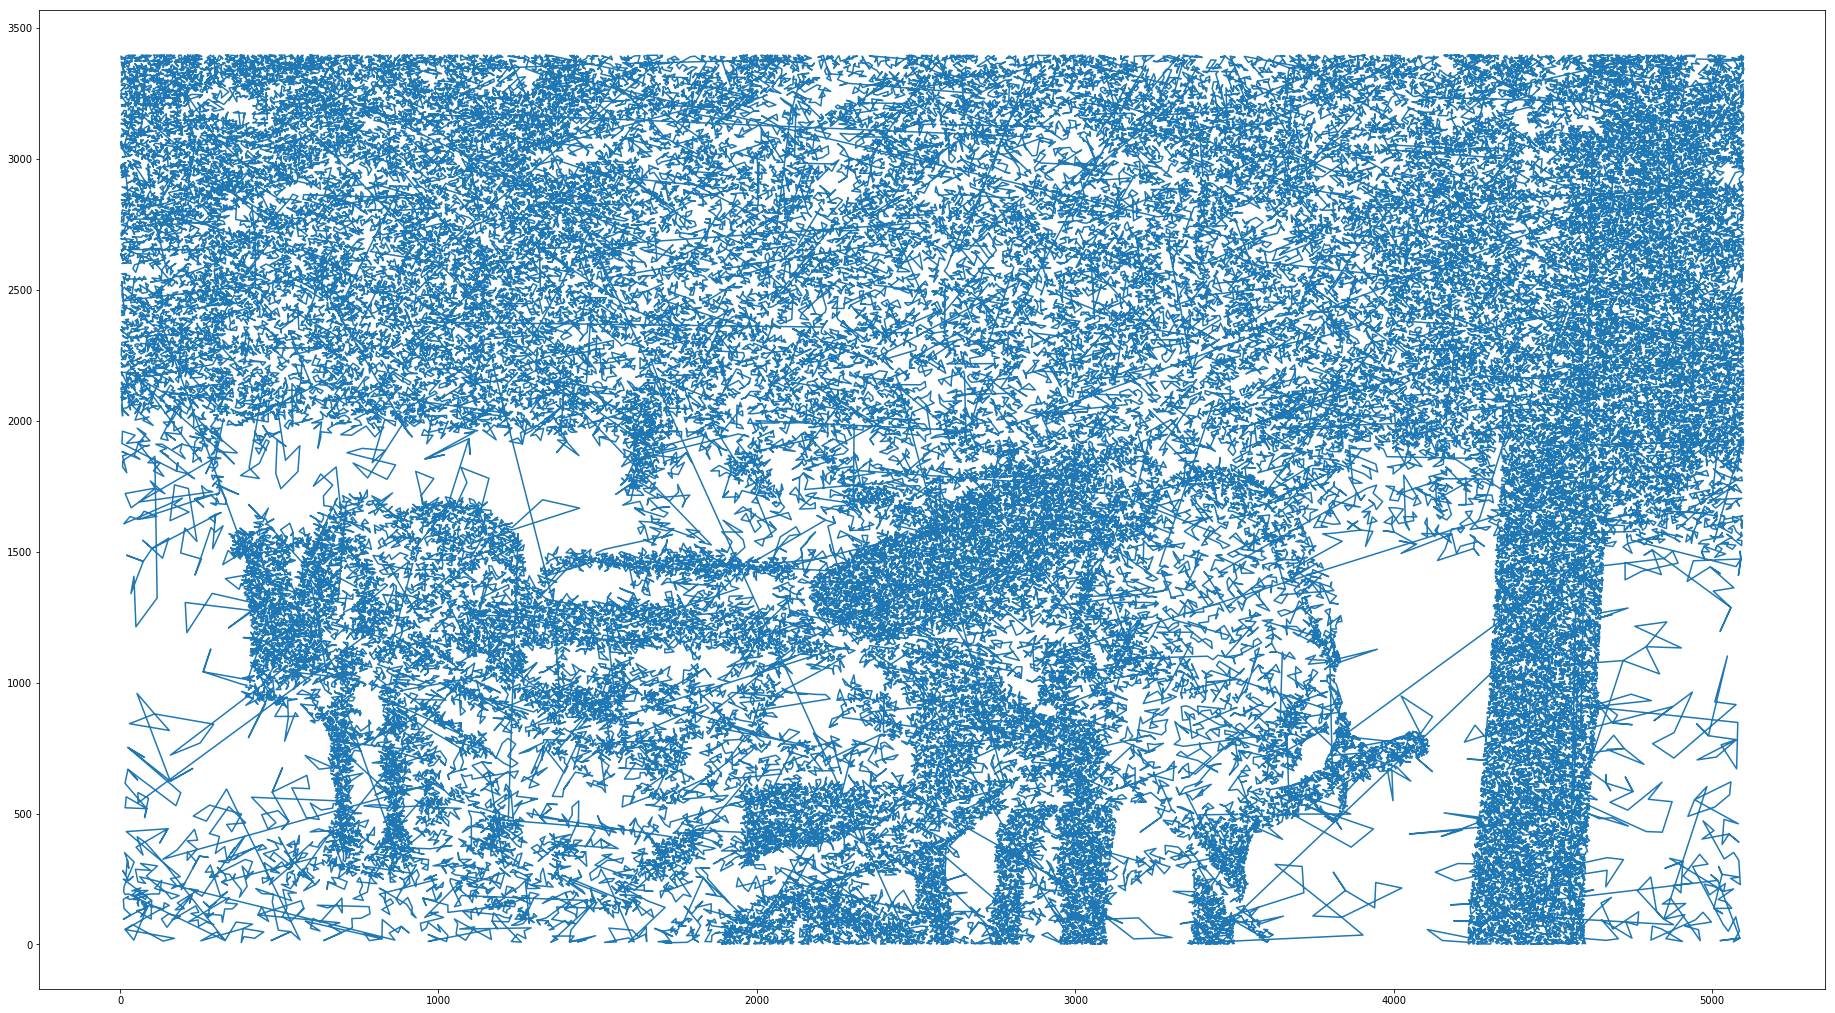

In [57]:
plt.figure(figsize=(32,18))
plt.rcParams['agg.path.chunksize'] = 10000 
plt.plot(cities.X[best_path], cities.Y[best_path])
plt.show()